In [105]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/enis/projects/nna/src


In [3]:
import csv
from os import listdir
from pathlib import Path

def loadLabels(labelsbyhumanpath):
    # filter csv extension also by username
    labelsbyhuman=[i for i in listdir(labelsbyhumanpath) if (".csv" in i ) ]
    humanresults={}
    counter=0
    for apath in labelsbyhuman:
        with open(labelsbyhumanpath / apath, newline='') as f:
            reader=csv.reader(f)
            for row in reader:
                counter+=1
                humanresults[row[0]]=row[1:]
    # print("unique files:",len(humanresults),"\ntotal files",counter)
    # Join vehicle and Aircraft
    for file_name,tagshere in humanresults.items():

        humanresults[file_name]=list(set(["Aircraft" if tag == "Vehicle" else tag for tag in tagshere]))

    return humanresults

NameError: name 'vectorized_y_true' is not defined

In [6]:
from pathlib import Path
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader

import torch.nn as nn
import torch.nn.functional as F


# fldr="/scratch/enis/data/nna/labeling/splits_preprocessed_real/"
# fname="S4A10209_20190505_093000_51m_7s__51m_17s_preprocessed.npy"

# preProcessedFile=Path(fldr)/fname


# preProcessedArray=np.load(preProcessedFile)

In [4]:
# import IPython.display as ipd
# ipd.Audio(sourcePath/file_name)

a


In [82]:
# import matplotlib.pyplot as plt
# from pydub import AudioSegment
# plt.figure(figsize=(10, 6))

# y, sr = librosa.load(sourcePath/file_name,sr=None)
# # audio = AudioSegment.from_file(sourcePath/file_name)

# mel=librosa.feature.melspectrogram(y=y+0.1, sr=sr)
# an_x = librosa.power_to_db(mel, ref=np.max)

# librosa.display.specshow(an_x, x_axis='time',
#                           y_axis='mel', sr=sr,
#                           fmax=8000)
# plt.colorbar(format='%+2.0f dB')

In [7]:
import csv 
from pathlib import Path
from os import listdir
from sklearn.model_selection import train_test_split

# import pickle

# from labeling_utils import load_labels

# import numpy as np
# from sklearn.metrics import precision_recall_fscore_support

# from sklearn.model_selection import train_test_split
# import pandas as pd

# tags=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Aircraft"]
tagSet=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Aircraft"]

# from tabulate import tabulate
# tag_set=tags[:]
# import torch

# %matplotlib inline



* Count only highest ranking tag (what if both of them exist)
* Bird tag is confusing, it can be also waterbird, how to handle ? Also Animal
* 

In [7]:
#LOAD MODEL predictions
splits_path= Path('/files/scratch/enis/data/nna/labeling/splits/')



In [8]:
# returns a dictionary, keys are tags from tag set and values are binary list 
# 
def vectorized_y_true(humanresults,tag_set):
    y_true={tag: np.zeros(len(humanresults)) for tag in tag_set}
    for i,tags in enumerate(humanresults.values()):
        # we  only look for tags in tag_set
        for tag in tag_set:
            if tag in tags:
                y_true[tag][i] = 1
            else:
                y_true[tag][i] = 0 
    return y_true



In [9]:
labelsbyhumanpath=Path('/scratch/enis/data/nna/labeling/results/')

humanresults = loadLabels(labelsbyhumanpath)

y_true_dict = vectorized_y_true(humanresults,tagSet)
y_true_all = pd.DataFrame(y_true_dict)
y_true = np.array(y_true_all).astype("float")

# with open(labelsbyhumanpath/"np_array_Ymatrix.npy", 'wb') as f:
#     np.save(f, y_true)

In [10]:
def map_reduce(X,func_type):
    if func_type=="Average":
        return np.mean(X,axis=1)
    elif func_type=="Concat":
        return np.reshape(X,(-1,1280))
    else:
        raise Exception("ERROR with embed type")

def pick_embed(embed_type:str, sourcePath: Path):
    
    for index,i in enumerate(humanresults):
        file_name=Path(i).stem
        if embed_type=="Raw":
            file_name+="_rawembed.npy"
        elif embed_type=="Normalized":
            file_name+="_rawembed.npy"
        elif embed_type=="Unsupervised":
            file_name+="_superembedv2.npy"
        elif embed_type=="LogMel":
            file_name+="_preprocessed.npy"

        else:
            raise Exception("ERROR with embed type")
        an_x=np.load(sourcePath / file_name)
        if index==0:
            X= np.empty((len(humanresults),*an_x.shape))
        X[index,:,:]=an_x[:]
    return X

In [11]:

sourcePath=Path('/scratch/enis/data/nna/labeling/split_embeddings/')
sourcePath=Path("/scratch/enis/data/nna/labeling/splits_preprocessed/")
# filter by username
# split_embeds=[i for i in listdir(sourcePath) ]
# raw_embeds =  [i for i in split_embeds if "rawembed" in i]
# proc_embeds = [i for i in split_embeds if "_embed" in i]
# super_embed = [i for i in split_embeds if "_superembedv2" in i]


In [12]:
import warnings
warnings.filterwarnings('ignore')

a
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 421 µs


In [16]:
%%time
import librosa
import librosa.display
import numpy as np
from pathlib import Path

sourcePath=Path("/scratch/enis/data/nna/labeling/splits/")
# sourcePath=Path("./louder/")

y_list=[]
for index,i in enumerate(humanresults):
    file_name=Path(i)
    y, sr = librosa.load(sourcePath/file_name,sr=None)
    y_list.append(y)
    if sr!=44100:
        print("different sampling rate",sr)
    print(index)

#shorten according to smallest
shortestLen=441000 #min([y.shape[0] for y in y_list])
y_list=[y[:shortestLen] for y in y_list]
y_list=[np.array(y).reshape(1,10,-1) for y in y_list]

X=np.concatenate(y_list,axis=0)


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


0


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1
2


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


3


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


4
5


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


6
7


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


8


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


9
10


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


11
12


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


13
14


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


15


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


16
17


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


18


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


19
20


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


21


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


22


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


23
24


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


25
26


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


27


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


28


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


29


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


30


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


31


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


32
33


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


34


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


35
36


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


37
38


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


39


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


40


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


41


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


42
43


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


44
45


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


46


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


47
48


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


49
50


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


51


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


52
53


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


54
55


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


56
57


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


58


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


59


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


60


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


61


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


62


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


63


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


64


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


65


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


66
67


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


68


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


69


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


70


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


71


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


72


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


73


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


74


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


75


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


76


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


77


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


78
79


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


80


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


81


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


82


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


83


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


84


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


85


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


86


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


87


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


88


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


89


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


90


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


91


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


92


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


93


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


94


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


95


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


96


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


97


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


98


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


99


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


100


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


101


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


102


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


103


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


104


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


105


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


106


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


107


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


108


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


109


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


110


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


111


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


112


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


113


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


114


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


115


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


116


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


117


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


118


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


119


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


120


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


121


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


122


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


123


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


124


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


125


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


126


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


127


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


128


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


129


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


130


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


131


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


132


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


133


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


134


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


135


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


136


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


137


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


138


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


139


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


140


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


141


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


142


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


143


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


144


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


145


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


146


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


147


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


148


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


149


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


150


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


151


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


152


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


153


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


154


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


155


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


156


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


157


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


158


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


159


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


160


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


161


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


162


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


163


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


164


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


165


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


166


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


167


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


168


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


169


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


170


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


171


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


172


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


173


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


174


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


175


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


176


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


177


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


178


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


179


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


180


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


181


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


182


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


183


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


184


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


185


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


186


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


187


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


188


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


189


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


190


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


191


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


192


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


193


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


194


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


195


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


196


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


197


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


198


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


199


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


200


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


201


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


202


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


203


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


204


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


205


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


206


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


207


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


208


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


209


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


210


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


211


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


212


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


213


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


214


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


215


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


216


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


217


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


218


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


219


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


220


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


221


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


222


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


223


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


224


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


225


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


226


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


227


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


228


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


229


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


230


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


231


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


232


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


233


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


234


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


235


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


236


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


237


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


238


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


239


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


240


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


241


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


242


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


243


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


244


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


245


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


246


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


247


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


248


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


249


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


250


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


251


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


252


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


253


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


254


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


255


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


256


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


257


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


258


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


259


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


260


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


261


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


262


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


263


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


264


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


265


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


266


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


267


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


268


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


269


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


270


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


271


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


272


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


273


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


274


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


275


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


276


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


277


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


278


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


279


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


280


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


281


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


282


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


283


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


284


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


285


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


286


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


287


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


288


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


289


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


290


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


291


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


292


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


293


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


294


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


295


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


296


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


297


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


298


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


299


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


300


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


301


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


302


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


303


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


304


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


305


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


306


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


307


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


308


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


309


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


310


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


311


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


312


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


313


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


314


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


315


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


316


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


317


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


318


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


319


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


320


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


321


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


322


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


323


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


324


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


325


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


326


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


327


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


328


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


329


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


330


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


331


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


332


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


333


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


334


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


335


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


336


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


337


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


338


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


339


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


340


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


341


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


342


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


343


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


344


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


345


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


346


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


347


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


348


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


349


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


350


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


351


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


352


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


353


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


354


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


355


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


356


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


357


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


358


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


359


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


360


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


361


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


362


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


363


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


364


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


365


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


366


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


367


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


368


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


369


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


370


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


371


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


372


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


373


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


374


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


375


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


376


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


377


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


378


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


379


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


380


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


381


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


382


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


383


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


384


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


385


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


386


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


387


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


388


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


389


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


390


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


391


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


392


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


393


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


394


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


395


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


396


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


397


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


398


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


399


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


400


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


401


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


402


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


403


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


404


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


405


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


406


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


407


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


408


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


409


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


410


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


411


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


412


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


413


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


414


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


415


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


416


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


417


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


418


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


419


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


420


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


421


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


422


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


423


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


424


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


425


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


426


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


427


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


428


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


429


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


430


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


431


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


432


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


433


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


434


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


435


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


436


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


437


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


438


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


439


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


440


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


441


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


442


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


443


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


444


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


445


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


446


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


447


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


448


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


449


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


450


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


451


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


452


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


453


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


454


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


455


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


456


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


457


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


458


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


459


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


460


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


461


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


462


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


463


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


464


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


465


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


466


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


467


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


468


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


469


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


470


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


471


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


472


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


473


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


474


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


475


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


476


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


477


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


478


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


479


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


480


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


481


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


482


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


483


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


484


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


485


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


486


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


487


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


488


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


489


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


490


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


491


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


492


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


493


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


494


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


495


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


496


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


497


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


498


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


499


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


500


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


501


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


502


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


503


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


504


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


505


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


506


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


507


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


508


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


509


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


510


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


511


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


512


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


513


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


514


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


515


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


516


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


517


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


518


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


519


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


520


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


521


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


522


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


523


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


524


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


525


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


526


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


527


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


528


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


529


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


530


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


531


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


532


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


533


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


534


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


535


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


536


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


537


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


538


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


539


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


540


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


541


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


542


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


543


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


544


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


545


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


546


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


547


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


548


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


549


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


550


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


551


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


552


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


553


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


554


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


555


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


556


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


557


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


558


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


559


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


560


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


561


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


562


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


563


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


564


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


565


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


566


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


567


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


568


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


569


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


570


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


571


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


572


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


573


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


574


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


575


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


576


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


577


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


578


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


579


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


580


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


581


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


582


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


583


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


584


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


585


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


586


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


587


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


588


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


589


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


590


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


591


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


592


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


593


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


594


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


595


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


596


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


597


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


598


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


599


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


600


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


601


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


602


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


603


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


604


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


605


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


606


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


607


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


608


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


609


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


610


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


611


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


612


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


613


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


614


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


615


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


616


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


617


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


618


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


619


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


620


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


621


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


622


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


623


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


624


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


625


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


626


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


627


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


628


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


629


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


630


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


631


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


632


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


633


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


634


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


635


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


636


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


637


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


638


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


639


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


640


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


641


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


642


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


643


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


644


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


645


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


646


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


647


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


648


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


649


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


650


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


651


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


652


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


653


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


654


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


655


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


656


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


657


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


658


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


659


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


660


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


661


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


662


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


663


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


664


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


665


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


666


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


667


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


668


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


669


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


670


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


671


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


672


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


673


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


674


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


675


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


676


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


677


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


678


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


679


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


680


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


681


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


682


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


683


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


684


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


685


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


686


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


687


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


688


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


689


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


690


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


691


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


692


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


693


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


694


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


695


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


696


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


697


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


698


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


699


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


700


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


701


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


702


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


703


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


704


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


705


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


706


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


707


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


708


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


709


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


710


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


711


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


712


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


713


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


714


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


715


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


716


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


717


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


718


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


719


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


720


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


721


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


722


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


723


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


724


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


725


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


726


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


727


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


728


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


729


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


730


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


731


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


732


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


733


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


734


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


735


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


736


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


737


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


738


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


739


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


740


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


741


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


742


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


743


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


744


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


745


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


746


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


747


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


748


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


749


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


750


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


751


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


752


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


753


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


754


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


755


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


756


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


757


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


758


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


759


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


760


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


761


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


762


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


763


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


764


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


765


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


766


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


767


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


768


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


769


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


770


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


771


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


772


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


773


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


774


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


775


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


776


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


777


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


778


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


779


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


780


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


781


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


782


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


783


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


784


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


785


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


786


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


787


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


788


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


789


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


790


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


791


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


792


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


793


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


794


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


795


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


796


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


797


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


798


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


799


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


800


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


801


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


802


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


803


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


804


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


805


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


806


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


807


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


808


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


809


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


810


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


811


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


812


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


813


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


814


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


815


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


816


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


817


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


818


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


819


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


820


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


821


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


822


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


823


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


824


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


825


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


826


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


827


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


828


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


829


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


830


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


831


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


832


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


833


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


834


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


835


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


836


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


837


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


838


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


839


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


840


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


841


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


842


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


843


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


844


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


845


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


846


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


847


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


848


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


849


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


850


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


851


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


852


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


853


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


854


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


855


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


856


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


857


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


858


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


859


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


860


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


861


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


862


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


863


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


864


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


865


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


866


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


867


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


868


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


869


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


870


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


871


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


872


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


873


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


874


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


875


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


876


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


877


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


878


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


879


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


880


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


881


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


882


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


883


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


884


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


885


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


886


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


887


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


888


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


889


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


890


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


891


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


892


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


893


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


894


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


895


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


896


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


897


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


898


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


899


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


900


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


901


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


902


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


903


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


904


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


905


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


906


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


907


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


908


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


909


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


910


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


911


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


912


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


913


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


914


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


915


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


916


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


917


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


918


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


919


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


920


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


921


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


922


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


923


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


924


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


925


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


926


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


927


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


928


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


929


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


930


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


931


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


932


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


933


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


934


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


935


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


936


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


937


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


938


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


939


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


940


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


941


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


942


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


943


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


944


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


945


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


946


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


947


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


948


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


949


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


950


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


951


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


952


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


953


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


954


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


955


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


956


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


957


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


958


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


959


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


960


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


961


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


962


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


963


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


964


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


965


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


966


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


967


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


968


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


969


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


970


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


971


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


972


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


973


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


974


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


975


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


976


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


977


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


978


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


979


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


980


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


981


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


982


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


983


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


984


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


985


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


986


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


987


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


988


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


989


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


990


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


991


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


992


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


993


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


994


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


995


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


996


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


997


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


998


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


999


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1000


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1001


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1002


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1003


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1004


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1005


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1006


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1007


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1008


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1009


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1010


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1011


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1012


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1013


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1014


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1015


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1016


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1017


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1018


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1019


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1020


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1021


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1022


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1023


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1024


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1025


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1026


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1027


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1028


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1029


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1030


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1031


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1032


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1033


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1034


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1035


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1036


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1037


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1038


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1039


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1040


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1041


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1042


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1043


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1044


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1045


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1046


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1047


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1048


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1049


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1050


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1051


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1052


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1053


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1054


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1055


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1056


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1057


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1058


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1059


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1060


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1061


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1062


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1063


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1064


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1065


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1066


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1067


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1068


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1069


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1070


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1071


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1072


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1073


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1074


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1075


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1076


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1077


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1078


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1079


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1080


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1081


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1082


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1083


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1084


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1085


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1086


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1087


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1088


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1089


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1090


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1091


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1092


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1093


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1094


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1095


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1096


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1097


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1098


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1099


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1100


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1101


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1102


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1103


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1104


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1105


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1106


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1107


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1108


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1109


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1110


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1111


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1112


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1113


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1114


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1115


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1116


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1117


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1118


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1119


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1120


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1121


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1122


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1123


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1124


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1125


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1126


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1127


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1128


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1129


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1130


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1131


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1132


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1133


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1134


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1135


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1136


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1137


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1138


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1139


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1140


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1141


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1142


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1143


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1144


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1145


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1146


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1147


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1148


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1149


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1150


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1151


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1152


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1153


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1154


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1155


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1156


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1157


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1158


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1159


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1160


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1161


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1162


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1163


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1164


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1165


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1166


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1167


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1168


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1169


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1170


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1171


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1172


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1173


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1174


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1175


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1176


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1177


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1178


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1179


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1180


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1181


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1182


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1183


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1184


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1185


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1186


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1187


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1188


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1189


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1190


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1191


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1192


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1193


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1194


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1195


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1196


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1197


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1198


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1199


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1200


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1201


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1202


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1203


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1204


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1205


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1206


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1207


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1208


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1209


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1210


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1211


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1212


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1213


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1214


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1215


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1216


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1217


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1218


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1219


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1220


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1221


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1222


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1223


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1224


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1225


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1226


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1227


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1228


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1229


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1230


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1231


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1232


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1233


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1234


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1235


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1236


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1237


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1238


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1239


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1240


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1241


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1242


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1243


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1244


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1245


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1246


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1247


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1248


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1249


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1250


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1251


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1252


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1253


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1254


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1255


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1256


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1257


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1258


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1259


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1260


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1261


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1262


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1263


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1264


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1265


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1266


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1267


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1268


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1269


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1270


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1271


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1272


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1273


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1274


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1275


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1276


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1277


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1278


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1279


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1280


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1281


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1282


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1283


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1284


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1285


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1286


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1287


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1288


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1289


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1290


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1291


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1292


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1293


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1294


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1295


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1296


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1297


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1298


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


1299
CPU times: user 1min 37s, sys: 4min 31s, total: 6min 9s
Wall time: 11min 7s


In [17]:
# with open(sourcePath/"np_array_Xmatrix_shortby441000.npy", 'wb') as f:
#     np.save(f, X)

In [19]:
%%time
with open(sourcePath/"np_array_Xmatrix_shortby441000.npy", 'rb') as f:
    a = np.load(f)

CPU times: user 0 ns, sys: 1.3 s, total: 1.3 s
Wall time: 1.3 s


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
                    X, y_true, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
                    X_train, y_train, test_size=0.25, random_state=42)


In [96]:
def randomAdd(data,y,count=1,unique=True):
    """
    Augment data by adding random samples.
    Generate count number of them.
    assumes [sampleIndex,sequence,...]
    does not modify data
    return array of new data and Y
    """
    if count<1:
        return None

    sequenceLen=data.shape[1]
    sampleCount=data.shape[0]

    if sampleCount<1:
        print("needs at least 2 samples")
        return None

    # Augment post samples
    NewOnes=np.empty((count,data.shape[1],*data.shape[2:]),dtype=data.dtype)
    NewOnesY=np.empty((count,*y.shape[1:]),dtype=y.dtype)
    patience=0
    generatedCount=0
    while  generatedCount < count:
        left=count-generatedCount
        left= sampleCount if left>sampleCount else left
        #randomly select 2*left # of samples
        firstIndexes = torch.randperm(data.shape[0])[:left]
        secondIndexes = torch.randperm(data.shape[0])[:left]
        first = data[firstIndexes].reshape(-1,*data.shape[1:])
        second = data[secondIndexes].reshape(-1,*data.shape[1:])
        firstY = y[firstIndexes]
        secondY = y[secondIndexes]
        new = first*0.5 + second*0.5
#         new=np.concatenate([first,second],axis=1)
        newY=np.logical_or(firstY,secondY ).reshape(-1,*y.shape[1:])
        
        NewOnes[generatedCount:generatedCount+new.shape[0]]=new[:]
        NewOnesY[generatedCount:generatedCount+newY.shape[0]]=newY[:]
        
        if unique:
            NewOnes,NewOnesIndex=np.unique(NewOnes,axis=0,return_index=True)
            NewOnesY=NewOnesY[NewOnesIndex]
            patience+=1
            if patience>(count*10):
                print("samples not random enough")
                break
        
        generatedCount+=NewOnes.shape[0]

    return NewOnes,NewOnesY


In [75]:
Xrand=np.random.randint(1,1000,(1200,10,44100))
yrand=np.random.randint(0,2,(1200,5))

In [102]:
%%time
r=randomAdd(Xrand,yrand,count=10000,unique=False)



CPU times: user 5.46 s, sys: 1min 25s, total: 1min 30s
Wall time: 1min 30s


In [ ]:
############################################## NOT UPDATED for multiLabel 
############# augmentation for TRAIN only 
pos_index= (y_train==1)
neg_index= (y_train==0)

X_train_pos=X_train[pos_index]
X_train_neg=X_train[neg_index]


###### randomMERGE
augmentad_pos=randomMerge(X_train_pos,400-X_train_pos.shape[0])
print("augmentad positive {} from {} ".format(augmentad_pos.shape[0],sum(pos_index)))
if type(augmentad_pos)!=None:
    X_train_pos=np.concatenate([augmentad_pos,X_train_pos]).astype("float32")

augmentad_neg = randomMerge(X_train_neg,800-X_train_neg.shape[0])
print("augmentad negative {} from {}".format(augmentad_neg.shape[0],sum(neg_index)))

if  type(augmentad_neg)!=None:
    X_train_neg=np.concatenate([augmentad_neg,X_train_neg]).astype("float32")

    
X_train = np.concatenate([X_train_pos,X_train_neg]).astype("float32")
y_train = np.concatenate([np.ones(X_train_pos.shape[0]),np.zeros(X_train_neg.shape[0])]).astype("int64")


############# calculate mel-spectogram for all data

XArrays=[X_val,X_test,X_train]
results=[]
for X_array_i in range(len(XArrays)):
    X_array = XArrays[X_array_i]
    for index,y in enumerate(X_array):
        
        mel=librosa.feature.melspectrogram(y=y.reshape(-1), sr=sr)
        an_x = librosa.power_to_db(mel, ref=np.max)
        if index==0:
            XMel = np.empty((X_array.shape[0],128,850))
        XMel[index,:,:]=an_x[:,:850]
        if index%100==0:
            print(index)
#     X_array = XMel[:]
    results.append(XMel)
#     print(X_array.shape)

X_val,X_test,X_train=results



In [77]:

############# augmentation for TRAIN only 


###### randomConcat
# augmentad_pos=randomConcat(X_train_pos,800-X_train_pos.shape[0])
# print("augmentad positive {} from {} ".format(augmentad_pos.shape[0],sum(pos_index)))

# augmentad_neg = randomConcat(X_train_neg,1200-X_train_neg.shape[0])
# print("augmentad negative {} from {}".format(augmentad_neg.shape[0],sum(neg_index)))


X_trainAugmented,y_trainAugmented = randomConcat(X_train,y_train,1400)
X_train = X_trainAugmented[:]
y_train = y_trainAugmented[:]
# to keep original ones in the same shape
# increase size of original ones by merging them with themselves or we could just use augmentad ones

# here I am repeating only validation and test
XArrays=[X_val,X_test]
for i,X_array in enumerate((XArrays)):
    XArrays[i]=np.concatenate([X_array,X_array],axis=1)
X_val,X_test=XArrays



    
############# calculate mel-spectogram for all data

XArrays=[X_val,X_test,X_train]
results=[]
for X_array_i in range(len(XArrays)):
    X_array = XArrays[X_array_i]
    for index,y in enumerate(X_array):
        
        mel=librosa.feature.melspectrogram(y=y.reshape(-1), sr=sr)
        an_x = librosa.power_to_db(mel, ref=np.max)
        if index==0:
            XMel = np.empty((X_array.shape[0],128,1700))
        XMel[index,:,:]=an_x[:,:1700]
        if index%100==0:
            print(index)
#     X_array = XMel[:]
    results.append(XMel)
#     print(X_array.shape)

X_val,X_test,X_train=results



0
100
200
0
100
200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [20]:

############# augmentation for TRAIN only 


###### randomADD
# augmentad_pos=randomConcat(X_train_pos,800-X_train_pos.shape[0])
# print("augmentad positive {} from {} ".format(augmentad_pos.shape[0],sum(pos_index)))

# augmentad_neg = randomConcat(X_train_neg,1200-X_train_neg.shape[0])
# print("augmentad negative {} from {}".format(augmentad_neg.shape[0],sum(neg_index)))


X_trainAugmented,y_trainAugmented = randomAdd(X_train,y_train,1400)
X_train = X_trainAugmented[:]
y_train = y_trainAugmented[:]
# to keep original ones in the same shape
# increase size of original ones by merging them with themselves or we could just use augmentad ones

# here I am repeating only validation and test
XArrays=[X_val,X_test]
for i,X_array in enumerate((XArrays)):
    XArrays[i]=np.concatenate([X_array,X_array],axis=1)
X_val,X_test=XArrays


    
############# calculate mel-spectogram for all data

XArrays=[X_val,X_test,X_train]
results=[]
for X_array_i in range(len(XArrays)):
    X_array = XArrays[X_array_i]
    for index,y in enumerate(X_array):
        
        mel=librosa.feature.melspectrogram(y=y.reshape(-1), sr=sr)
        an_x = librosa.power_to_db(mel, ref=np.max)
        if index==0:
            XMel = np.empty((X_array.shape[0],128,850))
        XMel[index,:,:]=an_x[:,:850]
        if index%100==0:
            print(index)
#     X_array = XMel[:]
    results.append(XMel)
#     print(X_array.shape)

X_val,X_test,X_train=results



2
0
100
200
0
100
200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [29]:
config.patience

10

In [18]:
X_train.shape

(780, 10, 44100)

In [21]:
# %%prun
# X_trainAugmented,y_trainAugmented = randomAdd(X_train,y_train,200)


In [22]:
# add channel dimension and turn data into float32
XArrays=[X_train,X_test,X_val]
for i,X_array in enumerate(XArrays):
    XArrays[i]=X_array.reshape(X_array.shape[0],1,*X_array.shape[1:])
    XArrays[i]=XArrays[i].astype("float32")
[X_train,X_test,X_val]=XArrays

In [79]:
sourcePath / "ITKILLIK1_20160823_114644_0000m_00s__0000m_10s.mp3"

PosixPath('/scratch/enis/data/nna/labeling/splits/ITKILLIK1_20160823_114644_0000m_00s__0000m_10s.mp3')

In [10]:
# X=pick_embed("LogMel",sourcePath)
# X=pick_embed("Unsupervised")
# Unsupervised
# X=map_reduce(X,map_reduce_type)
humanresults_keys=list(humanresults.keys())
X=X.astype("float32")

In [110]:
X=X.astype("float32")

In [258]:
XLouder=XLouder.astype("float32")

In [172]:
XMel=XMel.astype("float32")

In [31]:
# from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
# def cal_metrics(y_true_dict,y_pred_dict):
#     results={}
#     for tag in tag_set:
#         y_true = y_true_dict[tag]
#         y_pred = y_pred_dict[tag]
#         metrics=precision_recall_fscore_support(y_true, y_pred,pos_label=1,average="binary")
#         results[tag]=(metrics)
#     return results

# def cal_auc(y_true_dict,y_pred_dict_prob):
#     results={}
#     for tag in tag_set:
#         y_true = y_true_dict[tag]
#         y_pred = y_pred_dict_prob[tag]
#         metrics_auc=roc_auc_score(y_true, y_pred) #average_precision_score
#         results[tag]=(metrics_auc)

#     return results

# def print_results(results,y_true_dict,):
#     headers= ["Label","Positive","Precision","Recall","Fscore"]
#     table=[]
#     sample_count=len(next(iter(y_true_dict.values())))
#     print("Total sample:",sample_count,"And threshold is",prob_threshold)
#     for tag in (tag_set):
#         positive_count=sum(y_true_dict[tag])
#         table.append([tag,positive_count,*results[tag][:-1]])

#     print(tabulate(table, headers=headers))

    

In [23]:
def nogradloss(X_test,y_test):
    with torch.no_grad():    
        outputs_test = net(X_test)
        loss = criterion(outputs_test, y_test)
        return loss.item()

def nogradmetrics(X_test,y_test,net,multi_segment=False):
    with torch.no_grad():    
        if not multi_segment:
            y_pred = net(X_test)
#             print(y_pred.shape)
#             print(y_pred[1:5,:])
    #         print(y_pred)
            loss = criterion(y_pred, y_test)
    #         print(y_pred)
            y_pred=torch.exp(y_pred)
#             print(sum(torch.max(y_pred, 1)[1]))
#             _, predicted = torch.min(y_pred,1)
#             print(np.exp(_.cpu().numpy()),predicted)
#                     print(y_test.shape,y_pred.shape)
            train_auc=roc_auc_score(y_test.cpu().numpy(),
                                    y_pred[:,1].cpu().numpy()) 
            
            return loss.item(),train_auc
        else:
            y_pred = net(X_test)
            
            y_pred_10 =y_pred.reshape(-1,10,2)
            indices=torch.max(y_pred[:,1].reshape(-1,10),dim=1).indices
            y_pred_10 = y_pred_10[range(y_pred_10.shape[0]),indices,:].reshape(-1,2)
            
            y_test_10 = torch.max(y_test.reshape(-1,10),dim=1).values
            
            loss = criterion(y_pred_10, y_test_10)
            train_auc=roc_auc_score(y_test_10.cpu().numpy(),
                                    y_pred_10[:,1].cpu().numpy()) 
            return loss.item(),train_auc

        
class audioDataset(Dataset):

    def __init__(self,X,y, transform=None):
        """
        Args:

        """
        self.X=X
        self.y=y
#         self.landmarks_frame = pd.read_csv(csv_file)
#         self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):

        sample = self.X[idx],self.y[idx]

        if self.transform:
            sample = self.transform(sample)

        return sample

In [24]:
# import torch
# augmentad=torch.ones(13,10,128)
# torch.randperm(13)

In [25]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device="cpu"

# #randomly select 2*left # of samples
# first = augmentad[ torch.randperm(augmentad.shape[0])[:left]].reshape(-1,10,128)
# second = augmentad[ torch.randperm(augmentad.shape[0])[:left]].reshape(-1,10,128)
# # merge first half and second half of the samples
# new[:,0:5,:],new[:,5:10,:]=first[:,0:5,:],second[:,5:10,:]
# augmentad=np.concatenate([augmentad,new])
# #     print(augmentad.shape)

# augmentad=np.unique(augmentad,axis=0)

#### Run only one of the following cells that does splitting 

In [311]:
# fully forward best

# seperate,  
# different AUC calculation PART, to be fair  (do max of 10 predictions)
MULTI_SEGMENT = True
FLAT=False

X_train, X_test, y_train, y_test = train_test_split(
    X.reshape(X.shape[0],-1), y_true, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

# use 1 second as  samples
X_train=X_train.reshape(-1,np.prod(X.shape[2:]))
X_test=X_test.reshape(-1,np.prod(X.shape[2:]))
X_val=X_val.reshape(-1,np.prod(X.shape[2:]))

# repeat labels
y_train=np.repeat(y_train,10)
y_test=np.repeat(y_test,10)
y_val=np.repeat(y_val,10)




In [15]:
# LSTM 

# seperate,  
# different AUC calculation PART, to be fair  (do max of 10 predictions)
MULTI_SEGMENT = False
FLAT=False

X_train, X_test, y_train, y_test = train_test_split(
    X.reshape(X.shape[0],10,-1), y_true, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

# use 1 second as  samples
# X_train=X_train.reshape(-1,np.prod(X.shape[2:]))
# X_test=X_test.reshape(-1,np.prod(X.shape[2:]))
# X_val=X_val.reshape(-1,np.prod(X.shape[2:]))

# repeat labels
# y_train=np.repeat(y_train,10)
# y_test=np.repeat(y_test,10)
# y_val=np.repeat(y_val,10)




In [177]:
XMel.shape

(2000, 128, 850)

In [178]:
# CNN-2  

# seperate,  
# different AUC calculation PART, to be fair  (do max of 10 predictions)
MULTI_SEGMENT = False
FLAT=False

X_train, X_test, y_train, y_test = train_test_split(
    XMel.reshape(XMel.shape[0],1,XMel.shape[1],XMel.shape[2]), y_true_aug, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

## if MULTI_SEGMENT
# use 1 second as  samples
# X_train=X_train.reshape(-1,np.prod(X.shape[2:]))
# X_test=X_test.reshape(-1,np.prod(X.shape[2:]))
# X_val=X_val.reshape(-1,np.prod(X.shape[2:]))

# repeat labels
# y_train=np.repeat(y_train,10)
# y_test=np.repeat(y_test,10)
# y_val=np.repeat(y_val,10)




In [153]:
# CNN, Multi segment

# seperate,  
# different AUC calculation PART, to be fair  (do max of 10 predictions)
MULTI_SEGMENT = True
FLAT=False

X_train, X_test, y_train, y_test = train_test_split(
    X.reshape(X.shape[0],X.shape[1],1,X.shape[2],X.shape[3]), y_true, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

## if MULTI_SEGMENT
# use 1 second as  samples
X_train=X_train.reshape(*[X_train.shape[0]*X_train.shape[1]]+list(X_train.shape[2:]))
X_test=X_test.reshape(*[X_test.shape[0]*X_test.shape[1]]+list(X_test.shape[2:]))
X_val=X_val.reshape(*[X_val.shape[0]*X_val.shape[1]]+list(X_val.shape[2:]))


# repeat labels
y_train=np.repeat(y_train,10)
y_test=np.repeat(y_test,10)
y_val=np.repeat(y_val,10)




In [242]:
# see results on all data 
XALL=X.reshape(*[X.shape[0]*X.shape[1],1]+list(X.shape[2:]))
y_trueALL=np.repeat(y_true,10)
XALL=torch.from_numpy(XALL).to(device)
# birds

y_trueALL=torch.from_numpy(y_trueALL).to(device)

In [390]:
# X_test,X_val=X_test.to("cuda"),X_val.to("cuda")
# y_val,y_test=y_val.to("cuda"),y_test.to("cuda")

### From here, run all cells: moving data to device, model creation and training

In [27]:


def conv_output_shape(h_w, kernel_size=1, stride=1, pad=0, dilation=1):
    """
    Utility function for computing output of convolutions
    takes a tuple of (h,w) and returns a tuple of (h,w)
    """
    from math import floor
    if type(kernel_size) is not tuple:
        kernel_size = (kernel_size, kernel_size)
    h = floor( ((h_w[0] + (2 * pad) - ( dilation * (kernel_size[0] - 1) ) - 1 )/ stride) + 1)
    w = floor( ((h_w[1] + (2 * pad) - ( dilation * (kernel_size[1] - 1) ) - 1 )/ stride) + 1)
    return h, w

class NetCNN2(nn.Module):
    def __init__(self,out_channels,out_channels2,h_w,kernel_size,kernel_size2,FLAT=False):
        super(NetCNN2, self).__init__()
        self.out_channels=out_channels
        self.out_channels2=out_channels2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=self.out_channels, kernel_size=kernel_size,padding=(1, 1))
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1_h,self.conv1_w = conv_output_shape(h_w, kernel_size=kernel_size, pad=1)
        self.conv1_h,self.conv1_w=self.conv1_h//2,self.conv1_w//2
        
        self.conv2 = nn.Conv2d(in_channels=self.out_channels, out_channels=self.out_channels2, kernel_size=kernel_size2,padding=(1, 1))
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2_h,self.conv2_w = conv_output_shape([self.conv1_h,self.conv1_w], kernel_size=kernel_size2, pad=1)
        self.conv2_h,self.conv2_w=self.conv2_h//2,self.conv2_w//2
        
#         print(self.conv1_h,self.conv1_w)
# #         self.conv2 = nn.Conv2d(6, 16, 5)
        if FLAT:
            self.fc1 = nn.Linear(1280, 10) #100
        else:
            self.fc1 = nn.Linear(self.out_channels2*self.conv2_h*self.conv2_w, 10) #100
#         self.fc1 = nn.Linear(128, 32)
        torch.nn.init.xavier_normal_(self.fc1.weight)
        self.fc1_bn = nn.BatchNorm1d(10) # 100

        self.fc2 = nn.Linear(10, 10) # 32
        torch.nn.init.xavier_normal_(self.fc2.weight)
        self.fc2_bn = nn.BatchNorm1d(10)

        self.fc3 = nn.Linear(10,10)
        torch.nn.init.xavier_normal_(self.fc3.weight)
        self.fc3_bn = nn.BatchNorm1d(5)

        self.fc4 = nn.Linear(10, 8) #100
        torch.nn.init.xavier_normal_(self.fc4.weight)

        self.drop = nn.Dropout(p=0.4) #0.2
 
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x=self.drop(x)
        x = self.pool(F.relu(self.conv2(x)))
        x=self.drop(x)

        x = x.view(-1, self.out_channels2*self.conv2_h*self.conv2_w)

        x = F.relu(self.fc1_bn(self.fc1(x)))
        x=self.drop(x)

        x = self.fc4(x)
        x = torch.sigmoid(x) 
#         x = F.log_softmax(x,dim=1)
        return x


In [28]:


class NetCNN1(nn.Module):
    def __init__(self,out_channels,h_w,kernel_size,FLAT=False):
        super(NetCNN1, self).__init__()
        self.out_channels=out_channels
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=self.out_channels, kernel_size=kernel_size,padding=(1, 1))
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1_h,self.conv1_w = conv_output_shape(h_w, kernel_size=kernel_size, pad=1)
        self.conv1_h,self.conv1_w=self.conv1_h//2,self.conv1_w//2
#         print(self.conv1_h,self.conv1_w)
# #         self.conv2 = nn.Conv2d(6, 16, 5)
        if FLAT:
            self.fc1 = nn.Linear(1280, 10) #100
        else:
            self.fc1 = nn.Linear(self.out_channels*self.conv1_h*self.conv1_w, 10) #100
#         self.fc1 = nn.Linear(128, 32)
        torch.nn.init.xavier_normal_(self.fc1.weight)
        self.fc1_bn = nn.BatchNorm1d(10) # 100

        self.fc2 = nn.Linear(10, 10) # 32
        torch.nn.init.xavier_normal_(self.fc2.weight)
        self.fc2_bn = nn.BatchNorm1d(10)

        self.fc3 = nn.Linear(10,10)
        torch.nn.init.xavier_normal_(self.fc3.weight)
        self.fc3_bn = nn.BatchNorm1d(5)

        self.fc4 = nn.Linear(10, 8) #100
        torch.nn.init.xavier_normal_(self.fc4.weight)

        self.drop = nn.Dropout(p=0.4) #0.2
 
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
        x=self.drop(x)

        x = x.view(-1, self.out_channels*self.conv1_h*self.conv1_w)

        x = F.relu(self.fc1_bn(self.fc1(x)))
        x=self.drop(x)

        x = self.fc4(x)
        x = torch.sigmoid(x) 
#         x = F.log_softmax(x,dim=1)
        return x




In [122]:
for inputs, labels in dataloaders["val"]:
    print(labels.dtype)
    break

torch.int64


In [29]:
from IPython import display
import time
import torch.optim as optim
import copy


def train_model(model,dataloaders, criterion, optimizer, scheduler, statHistory, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_AUC = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []
            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                
                running_labels.append(labels[:].cpu().detach().numpy())
                
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
#                     _, preds = torch.max(outputs, 1)
                    labels=labels.float()
                    loss = criterion(outputs, labels)
    
                    preds =torch.exp(outputs)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_preds.append(preds.cpu().detach().numpy())
                running_loss += loss.item() * inputs.size(0)
        
            
            if phase == 'train' and not ((scheduler) is None):
                scheduler.step()
            
            running_preds = np.concatenate(running_preds)
            running_labels = np.concatenate(running_labels)
            epoch_auc_score = roc_auc_score(running_labels,
                                            running_preds) 
            
            epoch_loss = running_loss / len(sound_datasets[phase])

            statHistory[phase+"Loss"].append(epoch_loss)
            statHistory[phase+"AUC"].append(epoch_auc_score)
            
            print('{} Loss: {:.4f} AUC: {:.4f}'.format(
                phase, epoch_loss, epoch_auc_score))

            # deep copy the model
            if phase == 'val' and epoch_auc_score > best_AUC:
                best_AUC = epoch_auc_score
                best_model_wts = copy.deepcopy(model.state_dict())
            


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val AUC: {:4f}'.format(best_AUC))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model




In [130]:
# model = nn.Linear(20, 5) # predict logits for 5 classes
# x = torch.randn(1, 20)
# y = torch.tensor([[1., 0., 1., 0., 0.]]) # get classA and classC as active

# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.SGD(model.parameters(), lr=1e-1)

# for epoch in range(20):
#     optimizer.zero_grad()
#     output = model(x)
#     loss = criterion(output, y)
#     loss.backward()
#     optimizer.step()
#     print('Loss: {:.3f}'.format(loss.item()))


In [32]:

# criterion = nn.NLLLoss()
# criterion = nn.MSELoss()

# Binary Cross entropy loss for multi-label 
criterion = nn.BCEWithLogitsLoss()


# h_w=[128,1700]
# h_w=[128,850]
# kernel_size=(35,35)
# net = NetCNN1(2,h_w,kernel_size).float().to(device)
# statHistory={"valLoss":[],"trainLoss":[],"trainAUC":[],"valAUC":[]}

# h_w=[128,1700]
h_w=[128,850]
kernel_size=(3,3)
net = NetCNN2(8,8,h_w,kernel_size,kernel_size).float().to(device)
statHistory={"valLoss":[],"trainLoss":[],"trainAUC":[],"valAUC":[]}

optimizer = optim.AdamW(net.parameters(),weight_decay=0.001)
num_epochs=500
scheduler=None

bestModel=train_model(net, dataloaders,criterion, optimizer,
                      scheduler, statHistory, num_epochs=num_epochs)

Epoch 0/499
----------
train Loss: 0.7986 AUC: 0.5645
val Loss: 0.8358 AUC: 0.5925
Epoch 1/499
----------
train Loss: 0.7922 AUC: 0.5770
val Loss: 0.8240 AUC: 0.6176
Epoch 2/499
----------
train Loss: 0.7867 AUC: 0.5837
val Loss: 0.8072 AUC: 0.6099
Epoch 3/499
----------
train Loss: 0.7829 AUC: 0.5929
val Loss: 0.7956 AUC: 0.6047
Epoch 4/499
----------
train Loss: 0.7758 AUC: 0.6104
val Loss: 0.7596 AUC: 0.6048
Epoch 5/499
----------
train Loss: 0.7736 AUC: 0.5962
val Loss: 0.7580 AUC: 0.5947
Epoch 6/499
----------
train Loss: 0.7684 AUC: 0.5977
val Loss: 0.7734 AUC: 0.5906
Epoch 7/499
----------
train Loss: 0.7638 AUC: 0.5974
val Loss: 0.7528 AUC: 0.5850
Epoch 8/499
----------
train Loss: 0.7596 AUC: 0.6034
val Loss: 0.7441 AUC: 0.5934
Epoch 9/499
----------
train Loss: 0.7549 AUC: 0.6049
val Loss: 0.7813 AUC: 0.6041
Epoch 10/499
----------
train Loss: 0.7500 AUC: 0.6071
val Loss: 0.7695 AUC: 0.6011
Epoch 11/499
----------
train Loss: 0.7467 AUC: 0.6081
val Loss: 0.7228 AUC: 0.6125
Ep

KeyboardInterrupt: 

In [66]:
from argparse import ArgumentParser
from ignite.contrib.handlers.wandb_logger import *
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss
from ignite.contrib.metrics import  ROC_AUC
from ignite.handlers import ModelCheckpoint,EarlyStopping
from ignite.utils import setup_logger

In [60]:
# X_train=torch.from_numpy(X_train).to(device)
# X_test=torch.from_numpy(X_test).to(device)
# X_val=torch.from_numpy(X_val).to(device)
# # # birds

# y_val=torch.from_numpy(y_val).to(device)
# y_test=torch.from_numpy(y_test).to(device)
# y_train=torch.from_numpy(y_train).to(device)



params = {'batch_size': 32,
          'shuffle': True,
          'num_workers': 0}

# training_set=  audioDataset(X_train,y_train)
# training_generator = DataLoader(training_set, **params)

sound_datasets = {phase: audioDataset(XY[0],XY[1].float())
                  for phase,XY in zip(['train', 'val', "test"],[[X_train,y_train],[X_val,y_val],[X_test,y_test]])}


dataloaders = {x: torch.utils.data.DataLoader(sound_datasets[x], **params)
              for x in ['train', 'val',"test"]}


In [70]:
def activated_output_transform(output):
    y_pred, y = output
    y_pred = torch.exp(y_pred)
    return y_pred, y



def run(model, dataloaders,optimizer,criterion,metrics,device,
        config):
    
    trainer = create_supervised_trainer(model, optimizer, criterion, device=device)
    trainer.logger = setup_logger("Trainer")
    
    train_evaluator = create_supervised_evaluator(model, metrics=metrics, device=device)
    train_evaluator.logger = setup_logger("Train Evaluator")
    validation_evaluator = create_supervised_evaluator(model, metrics=metrics, device=device)
    validation_evaluator.logger = setup_logger("Val Evaluator")
    
    @trainer.on(Events.EPOCH_COMPLETED)
    def compute_metrics(engine):
        train_evaluator.run(train_loader)
        validation_evaluator.run(val_loader)

    wandb_logger = WandBLogger(
        project="pytorch-ignite-integration",
        name="ignite-mnist-example",
        config=config,
    )

    wandb_logger.attach_output_handler(
        trainer,
        event_name=Events.ITERATION_COMPLETED(every=100),
        tag="training",
        output_transform=lambda loss: {"batchloss": loss},
    )

    for tag, evaluator in [("training", train_evaluator), ("validation", validation_evaluator)]:
        wandb_logger.attach_output_handler(
            evaluator,
            event_name=Events.EPOCH_COMPLETED,
            tag=tag,
            metric_names=["loss", #"accuracy"
                          "ROC_AUC",
                         ],
            global_step_transform=lambda *_: trainer.state.iteration,
        )

    wandb_logger.attach_opt_params_handler(
        trainer, event_name=Events.ITERATION_COMPLETED(every=100), optimizer=optimizer
    )
    wandb_logger.watch(model, log="all")

    def score_function(engine):
        return engine.state.metrics["ROC_AUC"]
    
    def score_function2(engine):
        return engine.state.metrics["loss"]

    model_checkpoint = ModelCheckpoint(
        wandb_logger.run.dir,
        n_saved=2,
        filename_prefix="best",
        score_function=score_function,
        score_name="ROC_AUC",
        #`global_step_transform=global_step_from_engine(trainer)` to take the epoch of the `trainer`
        global_step_transform=global_step_from_engine(trainer),
    )
    validation_evaluator.add_event_handler(Events.COMPLETED, model_checkpoint, {"model": model})
    
    es_handler = EarlyStopping(patience=config["patience"], score_function=score_function2, trainer=trainer)
    validation_evaluator.add_event_handler(Events.COMPLETED, es_handler)

#     kick everything off
    trainer.run(train_loader, max_epochs=config["epochs"])

    wandb_logger.close()

In [71]:
os.environ["WANDB_NOTEBOOK_NAME"]="MLP_pytorch-4MultiLabel_Ignite"

In [72]:

train_loader=dataloaders["train"]
val_loader=dataloaders["val"]
h_w=[128,850]
kernel_size=(3,3)
model = NetCNN2(8,8,h_w,kernel_size,kernel_size).float().to(device)

#device is defined before

model.float().to(device)  # Move model before creating optimizer
weight_decay=0.001
optimizer = optim.AdamW(model.parameters(),weight_decay=weight_decay)

criterion = nn.BCEWithLogitsLoss()
# statHistory={"valLoss":[],"trainLoss":[],"trainAUC":[],"valAUC":[]}

metrics = { "loss": Loss(criterion),#"accuracy": Accuracy(),
           "ROC_AUC": ROC_AUC(activated_output_transform),
          }

epochs=500

config={
    "train_batch_size": params["batch_size"],
    "val_batch_size": params["batch_size"],
    "epochs": epochs,
    "patience":10,
    "weight_decay":weight_decay,
#     "lr": lr,
#     "momentum": momentum,
}

run(model, dataloaders,optimizer,criterion,metrics,device,
        config)




Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
2020-07-15 13:40:55,742 Trainer INFO: Engine run starting with max_epochs=500.
2020-07-15 13:40:57,198 Train Evaluator INFO: Engine run starting with max_epochs=1.
2020-07-15 13:40:57,482 Train Evaluator INFO: Epoch[1] Complete. Time taken: 00:00:00
2020-07-15 13:40:57,483 Train Evaluator INFO: Engine run complete. Time taken: 00:00:00
2020-07-15 13:40:57,484 Val Evaluator INFO: Engine run starting with max_epochs=1.
2020-07-15 13:40:57,542 Val Evaluator INFO: Epoch[1] Complete. Time taken: 00:00:00
2020-07-15 13:40:57,652 Val Evaluator INFO: Engine run complete. Time taken: 00:00:00
2020-07-15 13:40:57,653 Trainer INFO: Epoch[1] Complete. Time taken: 00:00:01
2020-07-15 13:40:58,831 Train Evaluator INFO: Engine run starting with max_epochs=1.
2020-07-15 13:40:59,169 Train Evaluator INFO: Epoch[1] Complete. Time taken: 00:00:00
2020-07-15 13:40:59,170 Train Evaluator INFO: Engin

In [34]:
best_acc1 # new v2 

NameError: name 'best_acc1' is not defined

In [310]:
# # save best model, change name accordingly, by adding validation accuracy
# import time
# timestr = time.strftime("%Y%m%d-%H%M%S")

# torch.save(best_model.state_dict(), "../../data/models/bird_FC_089valid_"+timestr+".pth")


In [59]:
net

NetCNN2(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=54272, out_features=10, bias=True)
  (fc1_bn): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc2_bn): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc3_bn): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=10, out_features=8, bias=True)
  (drop): Dropout(p=0.4, inplace=False)
)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4360381f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f43600581d0>)

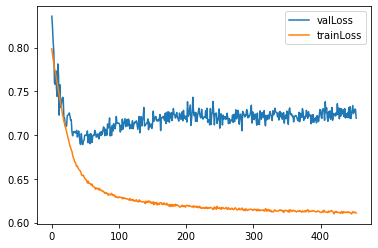

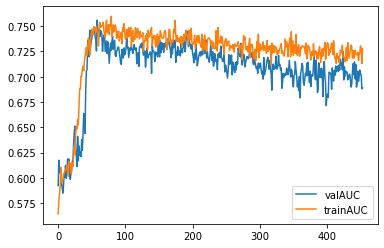

In [33]:
# visualize results
results=pd.DataFrame(statHistory)
results[["valLoss","trainLoss"]].plot(),results[["valAUC","trainAUC"]].plot(),

In [189]:
# results on test dataset, loss and AUC
best_model.eval() 
print(nogradmetrics(X_test,y_test,best_model,multi_segment=MULTI_SEGMENT))
print(nogradmetrics(X_val,y_val,best_model,multi_segment=MULTI_SEGMENT))

best_model=best_model.train()

(0.470717191696167, 0.926923173079327)
(0.3950149416923523, 0.9511773113668848)


In [285]:
y_pred = best_model(XALL)

y_pred_10 =y_pred.reshape(-1,10,2)
indices=torch.max(y_pred[:,1].reshape(-1,10),dim=1).indices
y_pred_10 = y_pred_10[range(y_pred_10.shape[0]),indices,:].reshape(-1,2)

y_test_10 = torch.max(y_trueALL.reshape(-1,10),dim=1).values

loss = criterion(y_pred_10, y_test_10)
y_test_10=y_test_10.cpu().detach().numpy()
# torch.exp(y_pred_10[:,1].cpu())
y_pred_10=torch.exp(y_pred_10[:,1]).cpu().detach().numpy()
train_auc=roc_auc_score(y_test_10,
                        y_pred_10) 

In [286]:
train_auc

0.8097363945578231

In [268]:
torch.exp(y_pred_10[:,1].cpu()),y_trueALL[:2]

(tensor([0.1898, 0.0020, 0.0172,  ..., 0.2798, 0.0657, 0.2020],
        grad_fn=<ExpBackward>),
 tensor([0, 0], device='cuda:0'))

In [269]:
y_pred_10=torch.exp(y_pred_10[:,1].cpu())

In [289]:
y_pred_10[y_pred_10>=0.5]=1
y_pred_10[y_pred_10<0.5]=0


In [303]:
fileNames=list(humanresults.keys())

In [307]:
y_test_10[y_test_10!=y_pred_10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

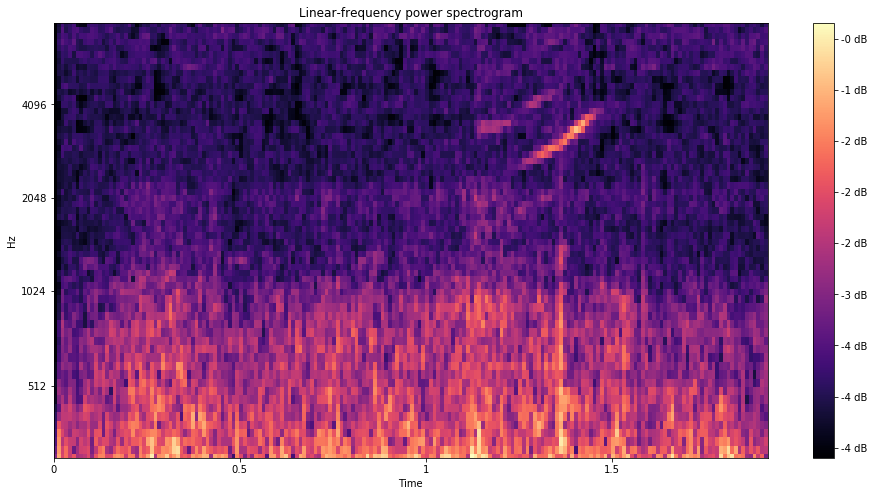

In [414]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

# D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
# plt.subplot(4, 2, 1)
librosa.display.specshow(X[68,0:2,:,:].reshape(-1,64).T,y_axis="mel",x_axis="time",sr=16000,fmax=7500,fmin=125,hop_length=160)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [402]:
new spectrum generate to see what happens 


(1300, 10, 96, 64)

In [236]:

items={}
from IPython.display import Audio,display,HTML,clear_output
from ipywidgets import Output

items["mp3_output"]=Output()

def play_html_modify(mp3file,items):
    out=items["mp3_output"]
    with out:
        clear_output()
    displayed=display(HTML("<audio autoplay controls loop src={} preload=\"auto\"> </audio>".format(mp3file)))


In [339]:
nextone=0


In [1]:
counter=0
srcPath="/files/scratch/enis/data/nna/labeling/splits/"
for i,b in enumerate(y_test_10!=y_pred_10):
    if b and y_test_10[i]==1:
        if counter==nextone:
            play_html_modify(srcPath+fileNames[i],items)
            print(srcPath+fileNames[i])
            print(i)
            break
        counter+=1
        
nextone+=1

In [279]:
sum(y_trueALL)

tensor(1960, device='cuda:0')

In [243]:
best_model=best_model.eval()
y_predAll=best_model(XALL).reshape(-1,10,2)

In [247]:
y_trueALL[0],y_predAll[0]

(tensor(0, device='cuda:0'),
 tensor([-0.1779, -1.8142], device='cuda:0', grad_fn=<SelectBackward>))

In [ ]:
test_set=audioDataset(X_test,y_test)
test_generator = DataLoader(test_set, **params)


Following linse are for comparing sklearn MLP and this model

In [189]:
X_last=X[:]
# X_last=X_last.reshape(X_last.shape[0],-1)
X_last=X_last.reshape(-1,128)
X_last_sklearn=X_last[:]
X_last=torch.from_numpy(X_last).to(device)


In [ ]:
X_last.shape

In [190]:
y_pred_10.shape,y_test_10.shape

(torch.Size([1300, 2]), torch.Size([260]))

In [213]:
X_val.shape,y_val.shape

(torch.Size([2600, 128]), torch.Size([2600]))

In [214]:
best_model.eval()
with torch.no_grad():    
    
    y_pred = best_model(X_val)
    y_pred_10 =y_pred.reshape(-1,10,2)
    indices=torch.max(y_pred[:,1].reshape(-1,10),dim=1).indices
    y_pred_10 = y_pred_10[range(y_pred_10.shape[0]),indices,:].reshape(-1,2)

    y_val_10 = torch.max(y_val.reshape(-1,10),dim=1).values

#     loss = criterion(y_pred_10, y_true)

    train_auc=roc_auc_score(y_val_10.cpu().numpy(),
                            y_pred_10[:,1].cpu().numpy()) 
    print(train_auc)


0.8961980807266867


In [217]:
y_pred=y_pred_10.cpu()
y_pred=torch.exp(y_pred[:,1])
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0


In [220]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp=confusion_matrix(y_val_10.cpu().numpy(), y_pred).ravel()
tn, fp, fn, tp
(164, 23, 21, 52)
    sklearn  pytorch
tp   52       68
fp   23       67
tn   164      120
fn   21       5



(120, 67, 5, 68)

In [1]:
total=0
for i,mm in enumerate(y_true):
    predict= 1 if y_pred[i]>0.5 else 0 
    if mm!=predict:
        total+=1
        print(humanresults_keys[i])
print(total)

#### compare with sklearn

In [171]:
import pickle

# and later you can load it
with open('../Visualizations/raw_many2one_NN.pkl', 'rb') as f:
    clf = pickle.load(f)

In [172]:
def many2one_predict(X,clf):
    
    result_count=(X.shape[0]//10) if X.shape[0]%10==0 else (X.shape[0]//10)+1
    results=np.empty(result_count)
    for i in range(0,X.shape[0],10):
        result10=clf.predict(X[i:i+10,:])
        results[(i//10)] = np.max(result10)
    return results

In [196]:
X_last_sklearn.shape

(13000, 128)

In [205]:
#TEST
samples=np.ones((200,128))
y_pred_sklearn=many2one_predict(X_val.cpu().numpy(),clf['Neural Net_Songbird'])

In [221]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp=confusion_matrix(y_val_10.cpu().numpy(), y_pred_sklearn).ravel()
tn, fp, fn, tp

(164, 23, 21, 52)

In [203]:
total=0
for i,mm in enumerate(y_true):
    predict= 1 if y_pred[i]>0.5 else 0 
    predict_sklearn=int(y_pred_sklearn[i])
    if mm!=predict and mm==1:
        total+=1
        print(humanresults_keys[i],mm,predict,predict_sklearn)
print(total)

CLVL2_20160604_153809_1807m_40s__1807m_50s.mp3 1 0 0
CLVL5_20160606_195535_1100m_07s__1100m_17s.mp3 1 0 0
OCNPT_20160626_214658_0865m_02s__0865m_12s.mp3 1 0 0
USGS_20160618_030453_1287m_34s__1287m_44s.mp3 1 0 0
SHORTY_20160619_042858_2563m_41s__2563m_51s.mp3 1 0 0
OCNPT3_20160615_005046_0813m_58s__0814m_08s.mp3 1 0 0
FSHCK3_20160720_115157_1777m_41s__1777m_51s.mp3 1 0 0
UMIRUK_20160621_083400_0515m_46s__0515m_56s.mp3 1 0 0
FSHCK4_20160629_194935_0237m_49s__0237m_59s.mp3 1 0 0
ITKILLIK1_20160710_091444_0974m_18s__0974m_28s.mp3 1 0 0
CLVL2_20160715_134031_0935m_28s__0935m_38s.mp3 1 0 0
FSHCK3_20160706_000310_2407m_12s__2407m_22s.mp3 1 0 0
ITKILLIK2_20160626_172259_2184m_56s__2185m_06s.mp3 1 0 0
FSHCK1_20160808_050938_0344m_36s__0344m_46s.mp3 1 0 0
ICERD_20160824_161434_0373m_50s__0374m_00s.mp3 1 0 0
CLVL2_20160715_134031_2759m_40s__2759m_50s.mp3 1 0 0
USGS_20160609_201955_0289m_57s__0290m_07s.mp3 1 0 0
CLVL4_20160701_002747_2710m_53s__2711m_03s.mp3 1 0 0
UMIAT_20130727_224356_0077m_01s__

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

In [411]:
np.exp([-6.7866, -4.4634])
F.softmax(torch.Tensor([0.5403, 0.4597]),dim=0),torch.exp(F.log_softmax(torch.Tensor([ 0.1147, -0.0307]),dim=0))

(tensor([0.5201, 0.4799]), tensor([0.5363, 0.4637]))